In [21]:
import MagmaPandas.geochemistry.volatile_solubility.Allison2022 as a
import MagmaPandas.geochemistry.volatile_solubility.IaconoMarziano as im
from MagmaPandas.geochemistry.eos_volatiles import hollowayBlank as h
a_config = a.Allison_configuration()
a_config.model = "co2"
a_config.print()

Settings________________________________
Fugacity model.............hollowayBlank
Species model........................co2

Calibration range______________________
Temperature..................1273-1673°K
Pressure........................< 7 kbar


In [3]:
# import pandas as pd
import MagmaPandas as mp
import MagmaPandas.parse.readers as r
import pandas as pd
import elements as e
import numpy as np
import matplotlib.pyplot as plt
import VESIcal as v
import meltInc.plotting as p
config = mp.configuration()

p.layout()

/Users/thomas/miniforge3/lib/python3.9/site-packages/VESIcal/calculate_classes.py:7: UserWarning: 

  from VESIcal.models import magmasat


In [4]:
melt = mp.read_melt_inclusion('./melt.csv', index_col=['name'], total_col='total')
inclusion = melt.iloc[8, :].copy()
inclusion

SiO2     45.421600
Al2O3    15.534700
MgO       6.969310
CaO       7.512700
FeO      11.547200
Na2O      3.572030
K2O       1.362990
MnO       0.204903
TiO2      3.238470
P2O5      0.728201
Cr2O3          NaN
CO2       0.334640
H2O       1.112624
F         0.082580
S         0.151180
Cl        0.059480
total    97.832611
dtype: float32

In [5]:
P_bar = 3e3
T_K = 1200+273.15

In [27]:
a.calculate_saturation(inclusion, T_K, x_fluid=0.4)

5168.794044884278

In [23]:
a.calculate_solubility(inclusion, P_bar, T_K, x_fluid=0.1)

0.2233663055468046

In [ ]:
inclusion

In [ ]:
inclusion.index.difference(inclusion._weights.index)

In [ ]:
CO2 = inclusion["CO2"]
cations = a.co2._cation_fractions_Allison(inclusion)
deltaV = a.co2._deltaV(cations)
lnK0 = a.co2._lnK0(cations)
FW = 36.594  # alkali basalt formula weight per 1 oxygen

XCO3 = CO2 * (1 / 44.01) / ((100 / FW) - (CO2 / FW))
Kf = XCO3 / (1 + XCO3)
deltaV, lnK0, XCO3

In [ ]:
a.co2._root_partial_pressure(2e3, T_K, deltaV, lnK0, Kf)

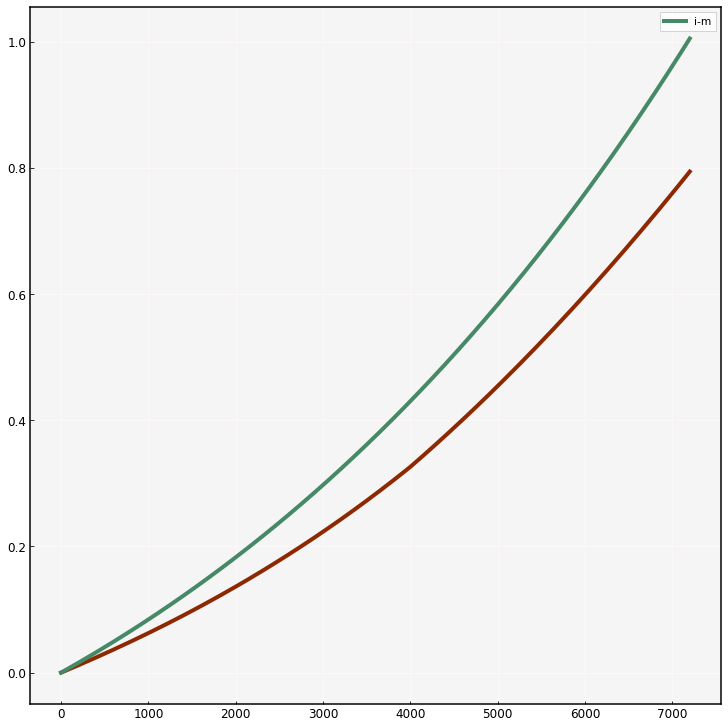

In [15]:
pressures = np.arange(0, 7.250e3, 50)

H2O = [a.h2o.calculate_solubility(p, T_K) for p in pressures]
CO2 = [a.co2.calculate_solubility(inclusion, p, T_K) for p in pressures]
CO2im = [im.co2.calculate_solubility(inclusion, p, T_K) for p in pressures]
H2Oim = [im.h2o.calculate_solubility(inclusion, p, T_K) for p in pressures]

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(pressures, CO2)
ax.plot(pressures, CO2im, label="i-m")
plt.legend()
plt.show()

In [11]:
pd.DataFrame({"P":pressures, "CO2":CO2, "CO2im": CO2im})

,P,CO2,CO2im
0,0.0,0.000000,0.000000
1,250.0,0.014812,0.019818
2,500.0,0.030163,0.040452
3,750.0,0.046108,0.061926
4,1000.0,0.062696,0.084266
5,1250.0,0.079971,0.107500
6,1500.0,0.097973,0.131654
7,1750.0,0.116741,0.156756
8,2000.0,0.136312,0.182835
9,2250.0,0.156723,0.209921


In [ ]:
pressures